In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#1) Acquiring data and importing the data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/infy.csv')
data

,DATE,OPEN,HIGH,LOW,PREV. CLOSE,VOLUME,VALUE,NO OF TRADES,CLOSE
0,2022-01-03,1887.75,1914.05,1887.75,1887.75,3329616.0,6.342326e+09,128107.0,1898.45
1,2022-01-04,1898.45,1906.65,1878.00,1898.45,3921999.0,7.408140e+09,120603.0,1899.15
2,2022-01-05,1900.00,1902.90,1840.00,1899.15,6995719.0,1.299484e+10,289755.0,1844.65
3,2022-01-06,1828.00,1828.00,1800.00,1844.65,6449205.0,1.168648e+10,232721.0,1817.80
4,2022-01-07,1815.45,1836.00,1806.80,1817.80,4834389.0,8.791607e+09,148117.0,1814.30
...,...,...,...,...,...,...,...,...,...
243,2022-12-26,1500.50,1509.90,1496.35,1497.10,4115459.0,6.189868e+09,128273.0,1502.40
244,2022-12-27,1509.95,1521.45,1497.50,1502.40,4860076.0,7.338690e+09,151234.0,1514.85
245,2022-12-28,1505.10,1524.95,1498.50,1514.85,5029860.0,7.600017e+09,138568.0,1510.15
246,2022-12-29,1504.00,1521.30,1501.00,1510.15,4624745.0,6.990343e+09,116090.0,1517.55


In [4]:
#2) Data Preprocessing for Time Series Data
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.index = data['DATE']

In [5]:
data.dtypes

DATE            datetime64[ns]
OPEN                   float64
HIGH                   float64
LOW                    float64
PREV. CLOSE            float64
VOLUME                 float64
VALUE                  float64
NO OF TRADES           float64
CLOSE                  float64
dtype: object

In [6]:
# 3) Data Cleaning: Handling Missing Values
data.dropna(inplace=True)
data.isnull().sum() ##There are no null values in the dataset

DATE            0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
VOLUME          0
VALUE           0
NO OF TRADES    0
CLOSE           0
dtype: int64

<ipython-input-7-adb75610e433>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


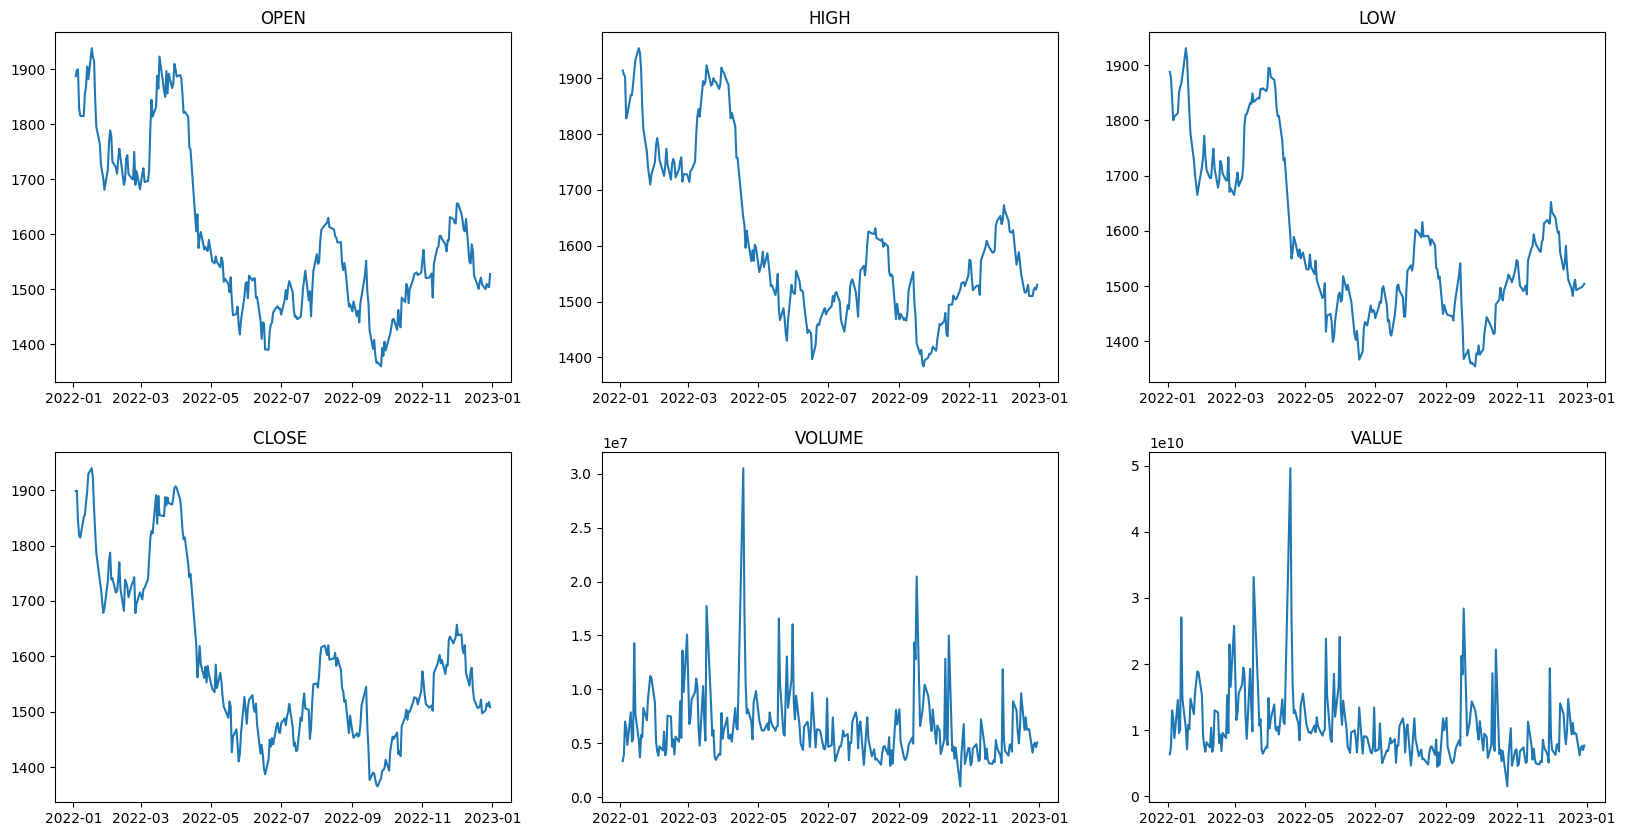

In [7]:
# 4) Data Exploration
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,10))

for i,cols in enumerate(['OPEN','HIGH','LOW','CLOSE ','VOLUME','VALUE']):
    plt.subplot(2,3,i+1)
    plt.title(cols)
    plt.plot(data[cols])
plt.show()

In [8]:
#5) -> 1) Dropping unnecessary features
data.drop(['PREV. CLOSE'], axis = 1, inplace = True)

In [9]:
#-> 2)
data.drop(['NO OF TRADES'], axis = 1, inplace = True)

In [10]:
data

,DATE,OPEN,HIGH,LOW,VOLUME,VALUE,CLOSE
DATE,,,,,,,
2022-01-03,2022-01-03,1887.75,1914.05,1887.75,3329616.0,6.342326e+09,1898.45
2022-01-04,2022-01-04,1898.45,1906.65,1878.00,3921999.0,7.408140e+09,1899.15
2022-01-05,2022-01-05,1900.00,1902.90,1840.00,6995719.0,1.299484e+10,1844.65
2022-01-06,2022-01-06,1828.00,1828.00,1800.00,6449205.0,1.168648e+10,1817.80
2022-01-07,2022-01-07,1815.45,1836.00,1806.80,4834389.0,8.791607e+09,1814.30
...,...,...,...,...,...,...,...
2022-12-26,2022-12-26,1500.50,1509.90,1496.35,4115459.0,6.189868e+09,1502.40
2022-12-27,2022-12-27,1509.95,1521.45,1497.50,4860076.0,7.338690e+09,1514.85
2022-12-28,2022-12-28,1505.10,1524.95,1498.50,5029860.0,7.600017e+09,1510.15


In [11]:
#6) Selecting the feature set and target variable :Feature Selection
target_var = pd.DataFrame(data['CLOSE '])
features = data[['OPEN', 'HIGH', 'LOW', 'VOLUME','VALUE']]

In [12]:
target_var

,CLOSE
DATE,
2022-01-03,1898.45
2022-01-04,1899.15
2022-01-05,1844.65
2022-01-06,1817.80
2022-01-07,1814.30
...,...
2022-12-26,1502.40
2022-12-27,1514.85
2022-12-28,1510.15


In [13]:
features

,OPEN,HIGH,LOW,VOLUME,VALUE
DATE,,,,,
2022-01-03,1887.75,1914.05,1887.75,3329616.0,6.342326e+09
2022-01-04,1898.45,1906.65,1878.00,3921999.0,7.408140e+09
2022-01-05,1900.00,1902.90,1840.00,6995719.0,1.299484e+10
2022-01-06,1828.00,1828.00,1800.00,6449205.0,1.168648e+10
2022-01-07,1815.45,1836.00,1806.80,4834389.0,8.791607e+09
...,...,...,...,...,...
2022-12-26,1500.50,1509.90,1496.35,4115459.0,6.189868e+09
2022-12-27,1509.95,1521.45,1497.50,4860076.0,7.338690e+09
2022-12-28,1505.10,1524.95,1498.50,5029860.0,7.600017e+09


In [14]:
#7) Scaling the features to a particular range: Feature Scaling
scaler = StandardScaler()
feature_transform = scaler.fit_transform(features)
feature_transform

array([[ 1.98529864,  2.04350884,  2.12743227, -0.97026931, -0.75730571],
       [ 2.05760303,  1.99393626,  2.06069657, -0.78956722, -0.5565383 ],
       [ 2.06807703,  1.96881503,  1.80059846,  0.14804856,  0.49582919],
       ...,
       [-0.60042809, -0.56307098, -0.53686221, -0.45162233, -0.52039453],
       [-0.60786126, -0.58752232, -0.51975049, -0.5751997 , -0.63523884],
       [-0.44568318, -0.52656144, -0.4988742 , -0.4422624 , -0.50471173]])

In [15]:
#8) Splitting the dataset into Train set and Test set by 80/20
X_train, X_test, y_train, y_test = train_test_split(feature_transform, target_var, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(198, 5) (50, 5) (198, 1) (50, 1)
